# 1. HIMPUNAN DATA

In [1]:
# Basic Library
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import skew

# Model Building
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df_train = pd.read_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_train.csv')
df_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

## 1.1. Encoder
Karena Machine Learning tidak bisa membaca korelasi dari suatu varibel jiga nilainya bernilai string, maka ubah terlebih dahulu nilai tersebut menjadi integer menggunakan encoder kategori.

In [4]:
# Encoder BusinessTravel Variable
# converting type of columns to 'category'
df_train['BusinessTravel'] = df_train['BusinessTravel'].astype('category')
# Assigning numerical values and storing in another column
df_train['BusinessTravel'] = df_train['BusinessTravel'].cat.codes

# Encoder Department Variable
df_train['Department'] = df_train['Department'].astype('category')
# Assigning numerical values and storing in another column
df_train['Department'] = df_train['Department'].cat.codes

# Encoder EducationField Variable
df_train['EducationField'] = df_train['EducationField'].astype('category')
# Assigning numerical values and storing in another column
df_train['EducationField'] = df_train['EducationField'].cat.codes

# Encoder Gender Variable
df_train['Gender'] = df_train['Gender'].astype('category')
# Assigning numerical values and storing in another column
df_train['Gender'] = df_train['Gender'].cat.codes

# Encoder JobRole Variable
df_train['JobRole'] = df_train['JobRole'].astype('category')
# Assigning numerical values and storing in another column
df_train['JobRole'] = df_train['JobRole'].cat.codes

# Encoder MaritalStatus Variable
df_train['MaritalStatus'] = df_train['MaritalStatus'].astype('category')
# Assigning numerical values and storing in another column
df_train['MaritalStatus'] = df_train['MaritalStatus'].cat.codes

# Encoder Over18 Variable
df_train['Over18'] = df_train['Over18'].astype('category')
# Assigning numerical values and storing in another column
df_train['Over18'] = df_train['Over18'].cat.codes

# Encoder OverTime Variable
df_train['OverTime'] = df_train['OverTime'].astype('category')
# Assigning numerical values and storing in another column
df_train['OverTime'] = df_train['OverTime'].cat.codes
df_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,1,1.0,2,3,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,1,6.0,2,3,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,2,7.0,1,2,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,0,NaN,3,3,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,1,7.0,4,1,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,2,750.0,1,28.0,3,1,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,2,447.0,1,NaN,3,1,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,1,1256.0,1,NaN,4,1,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,2,1378.0,1,13.0,2,4,1,2053,...,1,80,1,10,2,3,4,3,0,3


## 1.2. Data Cleaning
Mengisi missing values dengan mean.

In [5]:
#Cek Apakah Ada Data yang Kosong?
df_train.isnull().values.any()

True

In [6]:
#Data kosong pada kolom
#Data yang kosong akan diolah untuk diisi dengan mean-nya
df_train.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

### 1.2.1. Age

In [7]:
#Mengambil kolom Age untuk diisi dengan mean-nya
Age = df_train['Age']
Age.describe()

count    893.000000
mean      37.930571
std        9.395978
min       18.000000
25%       31.000000
50%       37.000000
75%       44.000000
max       60.000000
Name: Age, dtype: float64

In [8]:
df_train.Age = df_train.Age.fillna(value=df_train.Age.mean())

### 1.2.2. DailyRate

In [9]:
DailyRate = df_train['DailyRate']
DailyRate.describe()

count    1002.000000
mean      800.528942
std       408.109828
min       102.000000
25%       458.250000
50%       801.500000
75%      1162.000000
max      1496.000000
Name: DailyRate, dtype: float64

In [10]:
df_train.DailyRate = df_train.DailyRate.fillna(value=df_train.DailyRate.mean())

### 1.2.3. DistanceFromHome

In [11]:
DistanceFromHome = df_train['DistanceFromHome']
DistanceFromHome.describe()

count    934.000000
mean       9.930407
std        8.421791
min        1.000000
25%        2.000000
50%        8.000000
75%       16.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

In [12]:
df_train.DistanceFromHome = df_train.DistanceFromHome.fillna(value=df_train.DistanceFromHome.mean())

## 1.3. Cek Data Cleaning

Jika semua data telah terisi, silahkan cek kembali data yang sudah melewati tahap cleaning.

In [18]:
df_train_clean = df_train
df_train_clean.isnull().values.any()

False

In [19]:
df_train_clean.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 1.4. Visualisasi Korelasi Antar Atribut

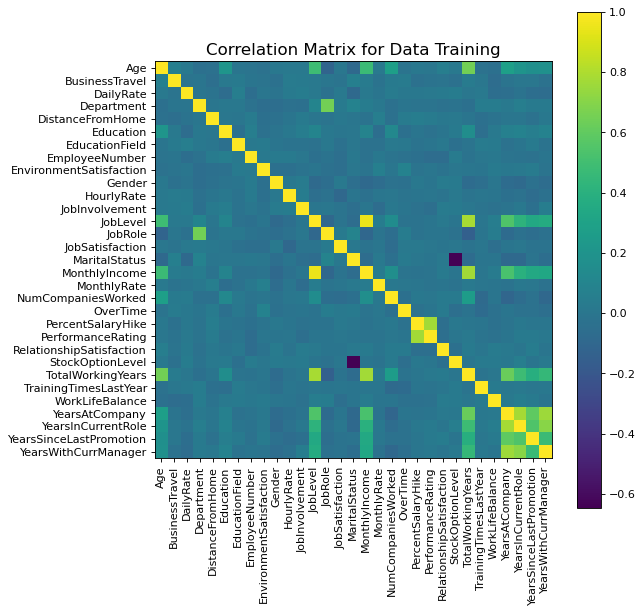

In [20]:
def plotCorrelationMatrix(df_train_clean, graphWidth):
    df_train_clean = df_train_clean[[col for col in df_train_clean if df_train_clean[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df_train_clean.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_train_clean.shape[1]}) is less than 2')
        return
    corr = df_train_clean.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Data Training', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(df_train_clean, 8)

In [21]:
df_train_clean.corr().abs()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.067385,0.021999,0.036827,0.032016,0.212995,0.007667,NaN,0.013967,0.022540,...,0.058293,NaN,0.021883,0.647349,0.024250,0.039244,0.282861,0.206222,0.171819,0.177369
BusinessTravel,0.067385,1.000000,0.010968,0.007386,0.042224,0.020100,0.029190,NaN,0.006448,0.010913,...,0.011312,NaN,0.034650,0.041585,0.008861,0.057465,0.012163,0.007058,0.005010,0.022000
DailyRate,0.021999,0.010968,1.000000,0.008587,0.017619,0.055751,0.055275,NaN,0.053794,0.001417,...,0.029459,NaN,0.048474,0.007446,0.022190,0.052937,0.041491,0.018993,0.048309,0.055554
Department,0.036827,0.007386,0.008587,1.000000,0.000730,0.012356,0.016550,NaN,0.025052,0.050362,...,0.026863,NaN,0.019428,0.035367,0.045614,0.044449,0.017248,0.060320,0.029148,0.026032
DistanceFromHome,0.032016,0.042224,0.017619,0.000730,1.000000,0.004803,0.001681,NaN,0.039257,0.039277,...,0.013673,NaN,0.017863,0.005445,0.038182,0.020034,0.002470,0.003348,0.024297,0.016454
Education,0.212995,0.020100,0.055751,0.012356,0.004803,1.000000,0.036262,NaN,0.058632,0.032129,...,0.005492,NaN,0.025609,0.159551,0.041845,0.018620,0.070545,0.087055,0.057998,0.083523
EducationField,0.007667,0.029190,0.055275,0.016550,0.001681,0.036262,1.000000,NaN,0.018691,0.033120,...,0.013268,NaN,0.035011,0.010136,0.036181,0.024400,0.022129,0.007522,0.024977,0.020744
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.013967,0.006448,0.053794,0.025052,0.039257,0.058632,0.018691,NaN,1.000000,0.017413,...,0.059879,NaN,0.041590,0.018604,0.009204,0.012589,0.009828,0.018311,0.025772,0.006427
EnvironmentSatisfaction,0.022540,0.010913,0.001417,0.050362,0.039277,0.032129,0.033120,NaN,0.017413,1.000000,...,0.016510,NaN,0.006108,0.002371,0.004123,0.025369,0.015683,0.019474,0.035938,0.009592


Berdasarkan analisis korelasi, dipilih beberapa variabel yang memiiki tingkat hubungan sedang terhadap MonthlyIncome. Variabel-variabel tersebut adalah Age, JobLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager.

In [22]:
df_train_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1.4. Drop Atribut

In [23]:
df_train_clean = df_train_clean.drop(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus','MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], axis=1)

In [24]:
df_train_clean.corr()

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany
Age,1.000000,0.487301,0.477357,0.647349,0.282861
JobLevel,0.487301,1.000000,0.952756,0.786130,0.544920
MonthlyIncome,0.477357,0.952756,1.000000,0.773499,0.525311
TotalWorkingYears,0.647349,0.786130,0.773499,1.000000,0.624096
YearsAtCompany,0.282861,0.544920,0.525311,0.624096,1.000000


In [25]:
# Menentukan variabel X dan variabel Y
x_train = df_train_clean[['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']]
y_train = df_train_clean[['MonthlyIncome']]

In [ ]:
df_train_clean.to_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_train_clean.csv')

## 1.5. Visualisasi Data Training

#### Plot The Independent vs Dependent Variable

In [26]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

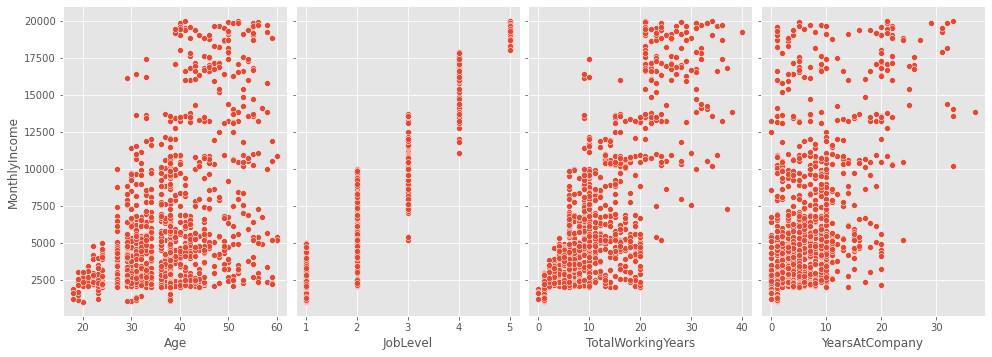

In [27]:
vis_train = pd.read_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_train_clean.csv')
vis_train = vis_train.drop(['Unnamed: 0'], axis=1)
sns.pairplot(vis_train, x_vars = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'], y_vars = 'MonthlyIncome', height=5, aspect=0.7)

#### Plot The Heatmap

<AxesSubplot:>

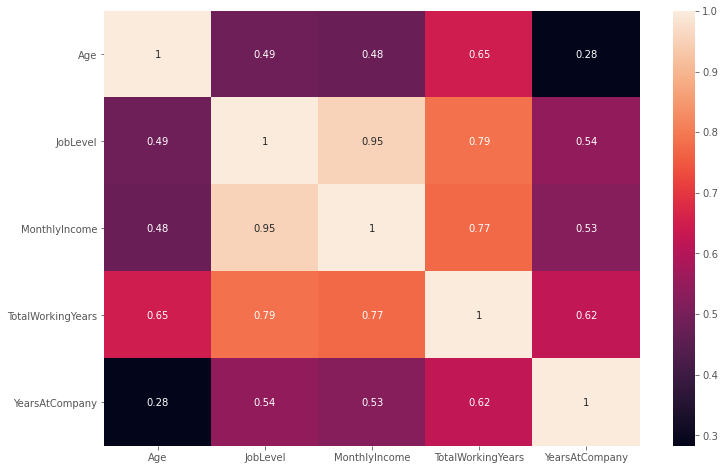

In [28]:
sns.heatmap(vis_train.corr(), annot=True)

# 2. DATA MINING & PENGETAHUAN

## 2.1. Data Testing

In [29]:
df_test = pd.read_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_test.csv')
df_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,...,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,...,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,...,3,80,2,13,2,3,5,4,0,4


### 2.1.1. Encoder

In [30]:
# Encoder BusinessTravel Variable
# converting type of columns to 'category'
df_test['BusinessTravel'] = df_test['BusinessTravel'].astype('category')
# Assigning numerical values and storing in another column
df_test['BusinessTravel'] = df_test['BusinessTravel'].cat.codes

# Encoder Department Variable
df_test['Department'] = df_test['Department'].astype('category')
# Assigning numerical values and storing in another column
df_test['Department'] = df_test['Department'].cat.codes

# Encoder EducationField Variable
df_test['EducationField'] = df_test['EducationField'].astype('category')
# Assigning numerical values and storing in another column
df_test['EducationField'] = df_test['EducationField'].cat.codes

# Encoder Gender Variable
df_test['Gender'] = df_test['Gender'].astype('category')
# Assigning numerical values and storing in another column
df_test['Gender'] = df_test['Gender'].cat.codes

# Encoder JobRole Variable
df_test['JobRole'] = df_test['JobRole'].astype('category')
# Assigning numerical values and storing in another column
df_test['JobRole'] = df_test['JobRole'].cat.codes

# Encoder MaritalStatus Variable
df_test['MaritalStatus'] = df_test['MaritalStatus'].astype('category')
# Assigning numerical values and storing in another column
df_test['MaritalStatus'] = df_test['MaritalStatus'].cat.codes

# Encoder Over18 Variable
df_test['Over18'] = df_test['Over18'].astype('category')
# Assigning numerical values and storing in another column
df_test['Over18'] = df_test['Over18'].cat.codes

# Encoder OverTime Variable
df_test['OverTime'] = df_test['OverTime'].astype('category')
# Assigning numerical values and storing in another column
df_test['OverTime'] = df_test['OverTime'].cat.codes
df_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,...,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,...,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,...,3,80,2,13,2,3,5,4,0,4


In [31]:
df_test.isnull().values.any()

True

In [32]:
df_test.isnull().sum()

Age                         55
BusinessTravel               0
DailyRate                   14
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSin

### 2.1.2. Data Cleaning

In [33]:
# Missing Value in Age
Age = df_test['Age']
df_test.Age = df_test.Age.fillna(value=df_test.Age.mean())

# Missing Value in DailyDate
DailyRate = df_test['DailyRate']
df_test.DailyRate = df_test.DailyRate.fillna(value=df_test.DailyRate.mean())

# Missing Value in DistanceFromHome
DistanceFromHome = df_test['DistanceFromHome']
df_test.DistanceFromHome = df_test.DistanceFromHome.fillna(value=df_test.DistanceFromHome.mean())

# Missing Value in BusinessTravel
BusinessTravel = df_test['BusinessTravel']
df_test.BusinessTravel = df_test.BusinessTravel.fillna(value=df_test.BusinessTravel.mean())

# Missing Value in MartialStatus
MaritalStatus = df_test['MaritalStatus']
df_test.MaritalStatus = df_test.MaritalStatus.fillna(value=df_test.MaritalStatus.mean())

In [34]:
df_test.isnull().values.any()

False

In [35]:
df_test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [36]:
# Eliminasi Variabel yang Tidak akan digunakan
df_test_clean = df_test.drop(['BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance','YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], axis=1)

In [37]:
df_test_clean.corr().abs()

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany
Age,1.000000,0.449794,0.439321,0.623246,0.294041
JobLevel,0.449794,1.000000,0.944295,0.772222,0.511125
MonthlyIncome,0.439321,0.944295,1.000000,0.771358,0.488875
TotalWorkingYears,0.623246,0.772222,0.771358,1.000000,0.638163
YearsAtCompany,0.294041,0.511125,0.488875,0.638163,1.000000


In [42]:
x_test = df_test_clean[['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']]
y_test = df_test_clean[['MonthlyIncome']]

In [ ]:
df_test_clean.to_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_test_clean.csv')

### 2.1.3. Visualisasi Data Testing

#### Plot The Independent vs Dependent Variable

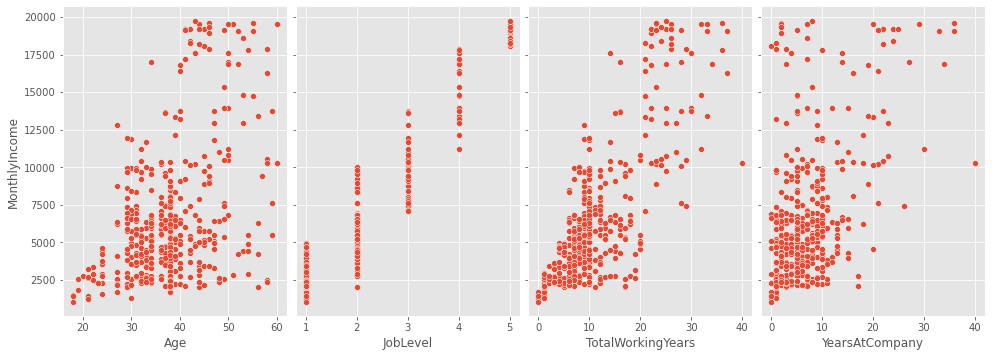

In [38]:
vis_test = pd.read_csv('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_attrition_test_clean.csv')
vis_test = vis_test.drop(['Unnamed: 0'], axis=1)

sns.pairplot(vis_test, x_vars = ['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany'], y_vars = 'MonthlyIncome', height=5, aspect=0.7)

#### Plot The Heatmap

<AxesSubplot:>

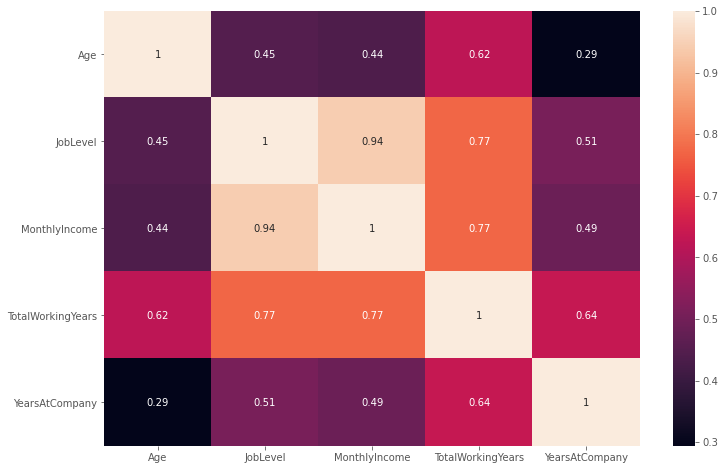

In [39]:
sns.heatmap(vis_test.corr(), annot=True)

## 2.2. Training Data dengan Linear Multivariate Regression
Karena kita sudah melihat bahwa mungkin ada hubungan antara variabel independen dan dependen, mari terus membangun model regresi kita. Kami akan menggunakan LinearRegression()fungsi dari perpustakaan sklearn untuk membangun model kami.

In [40]:
regressor = LinearRegression()
persamaan = regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[  -5.05425997 3871.75302822   46.94057998   -9.84604878]]
[-1728.52019705]


Y = -1728 - 5X1 + 3871X2 + 46X3 - 9X4

Mari kita uraikan arti dari masing-masing angka itu:
- Nilai intersep adalah perkiraan nilai rata-rata variabel dependen kami ketika semua nilai variabel independen kami adalah 0. 
- Untuk koefisien, kami memiliki 4 nilai untuk variabel Age, JobLevel, TotalWorkingYears, dan YearsAtCompany. Nilai ini merepresentasikan hubungan variabel independen kita dengan variabel dependen, di mana perubahan tepat 1 pada variabel independen akan mengubah nilai variabel dependen kita sebesar koefisien.

## 2.3. Prediksi Data Testing

In [43]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[ 6055.3372167 ]
 [ 5942.42878603]
 [ 2059.02512321]
 [10822.96563988]
 [ 6456.08314619]
 [ 2268.14424196]
 [ 2183.58418848]
 [ 2245.16260605]
 [10551.85560191]
 [ 1988.2654837 ]
 [ 2016.96620641]
 [10542.27202428]
 [ 6212.77397683]
 [ 2341.54589091]
 [ 2190.26328552]
 [ 2372.396393  ]
 [ 6308.27997386]
 [ 2638.82708281]
 [10020.13398126]
 [14199.85167379]
 [ 2218.96400823]
 [ 6667.01699672]
 [ 6142.44940525]
 [ 6119.68023032]
 [ 6204.02782282]
 [18687.6637692 ]
 [ 2043.86234332]
 [ 6182.04606135]
 [ 2153.25862869]
 [ 6345.06202374]
 [ 6263.84151878]
 [ 6119.68023032]
 [ 6109.57171039]
 [10203.94193599]
 [ 6564.38968276]
 [10159.50348091]
 [10347.00332967]
 [ 2160.86502372]
 [ 2025.3600149 ]
 [ 2062.4545461 ]
 [ 6307.44255024]
 [ 6156.51229037]
 [ 6216.63846765]
 [ 2307.00349477]
 [ 2013.53678352]
 [ 6354.38313022]
 [10057.80346493]
 [ 6100.30061409]
 [ 6567.81910565]
 [ 2084.29642304]
 [14716.91289056]
 [ 2218.96400823]
 [18255.19004979]
 [ 6214.08633259]
 [ 2369.8942681 ]
 [ 6243.88

In [44]:
vis_test['MonthlyIncome Prediction'] = y_pred.tolist()
vis_test

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,MonthlyIncome Prediction
0,38.0,2,8463,6,5,[6055.337216703052]
1,53.0,2,4450,5,4,[5942.428786026944]
2,24.0,1,1555,1,1,[2059.025123210526]
3,45.0,3,9724,25,1,[10822.965639881542]
4,36.0,2,5914,16,13,[6456.083146192416]
...,...,...,...,...,...,...
436,33.0,2,4373,5,4,[6043.513985328129]
437,27.0,2,6349,6,5,[6110.934076318704]
438,38.0,1,3464,5,3,[2156.33570605762]
439,39.0,2,5204,13,5,[6378.867016589184]


In [ ]:
vis_test.to_excel('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_vis_test.xlsx')

# 3. EVALUASI DATA

## 3.1. Nilai R Square (Sklearn Metrics)

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score (y_test, y_pred)
print ("Nilai R2 adalah ", r2)

Nilai R2 adalah  0.894582813656067


## 3.2. Validasi Model

In [46]:
X = df_train_clean[['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_train['MonthlyIncome'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     2571.
Date:                Fri, 31 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:51:52   Log-Likelihood:                -8944.9
No. Observations:                1029   AIC:                         1.790e+04
Df Residuals:                    1024   BIC:                         1.792e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1728.5202    230.58

## 3.3. Uji F (ANOVA)
F-test atau ANOVA (Analysis of variance) dalam regresi multi-linier dapat digunakan untuk menentukan apakah model kompleks kita berkinerja lebih baik daripada model yang lebih sederhana (misalnya model dengan hanya satu variabel independen). Dengan uji-F kita dapat mengevaluasi signifikansi model kita dengan menghitung probabilitas pengamatan statistik-F yang setidaknya setinggi nilai yang diperoleh model kita. Mirip dengan skor R², kita bisa dengan mudah mendapatkan statistik F dan probabilitas statistik F tersebut dengan mengakses atribut .fvaluesdan .f_pvaluesdari model kita seperti di bawah ini.

In [47]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 2570.622889791836
Probability of observing value at least as high as F-statistic: 0.0


## 3.4. Uji-t
Statistik-t adalah koefisien dibagi dengan kesalahan standarnya. Kesalahan standar adalah perkiraan deviasi standar koefisien, jumlahnya bervariasi di setiap kasus. Ini dapat dianggap sebagai ukuran ketepatan yang digunakan untuk mengukur koefisien regresi. Sama seperti uji-F, nilai-p menunjukkan probabilitas untuk melihat hasil yang ekstrim seperti yang dimiliki model kita. Kita juga bisa mendapatkan nilai p untuk semua variabel kita dengan memanggil .pvaluesatribut pada model.

In [48]:
print(olsmod.pvalues)

const                1.419659e-13
Age                  4.643777e-01
JobLevel             0.000000e+00
TotalWorkingYears    6.771641e-05
YearsAtCompany       3.136608e-01
dtype: float64


## 3.5. Pengujian Asumsi
Selanjutnya kita akan memvalidasi model kita dengan melakukan analisis residual, berikut adalah daftar pengujian atau asumsi yang akan kita lakukan untuk mengecek validitas model kita:
- Linearitas
- Normalitas
- Multikolinieritas
- Autokorelasi
- Homoskedastisitas

In [49]:
df_test_new = pd.read_excel('E:\Data_Urang\Mata Kuliah\Semester 3\PROJECT II\Project New\PROJECT-2\dataset\employee_vis_test.xlsx')
df_test_new2 = df_test_new.drop(['Unnamed: 0'], axis=1)

df_test_new2['MonthlyIncome Prediction'] = olsmod.predict(X)
df_test_new2['residual'] = olsmod.resid
df_test_new2

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,MonthlyIncome Prediction,residual
0,38,2,8463,6,5,14958.647233,2440.352767
1,53,2,4450,5,4,6132.078414,-1191.078414
2,24,1,1555,1,1,2074.187903,604.812097
3,45,3,9724,25,1,18564.556944,-364.556944
4,36,2,5914,16,13,10390.079419,54.920581
...,...,...,...,...,...,...,...
436,33,2,4373,5,4,2178.529929,1725.470071
437,27,2,6349,6,5,10084.124649,-2672.124649
438,38,1,3464,5,3,2143.412580,792.587420
439,39,2,5204,13,5,2242.085529,27.914471


## 3.6. Linearitas
Ini mengasumsikan bahwa terdapat hubungan linier antara variabel bebas dan variabel terikat. Dalam kasus kami karena kami memiliki beberapa variabel independen, kami dapat melakukan ini dengan menggunakan plot pencar untuk melihat nilai prediksi kami versus nilai sebenarnya.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


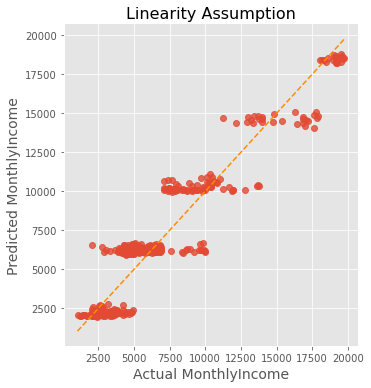

In [50]:
# Plotting the observed vs predicted values
sns.lmplot(x='MonthlyIncome', y='MonthlyIncome Prediction', data=df_test_new, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(vis_test[['MonthlyIncome', 'MonthlyIncome Prediction']].min().min()-10, 
                        vis_test[['MonthlyIncome', 'MonthlyIncome Prediction']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted MonthlyIncome', fontsize=14)
plt.xlabel('Actual MonthlyIncome', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

Plot sebar menunjukkan titik sisa yang tersebar merata di sekitar garis diagonal, sehingga kita dapat mengasumsikan bahwa ada hubungan linier antara variabel independen dan dependen kita

## 3.7. Normalitas
Ini mengasumsikan bahwa istilah kesalahan model terdistribusi normal. Kami akan memeriksa normalitas residual dengan memplotnya ke dalam histogram dan melihat nilai p dari uji normalitas Anderson-Darling. Kita akan menggunakan normal_ad()fungsi dari statsmodel untuk menghitung p-value kita dan kemudian membandingkannya dengan threshold 0,05, jika p-value yang kita peroleh lebih tinggi dari threshold maka kita dapat mengasumsikan bahwa residual kita terdistribusi normal.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.00032261031299658875


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


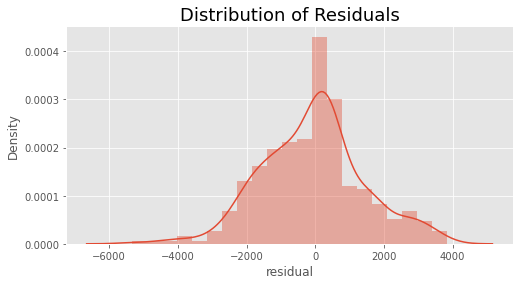

Residuals are not normally distributed


In [51]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_test_new2['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_test_new2['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

## 3.8. Multikolinieritas
Ini mengasumsikan bahwa prediktor yang digunakan dalam regresi tidak berkorelasi satu sama lain. Untuk mengidentifikasi apakah ada korelasi antara prediktor kami, kami dapat menghitung koefisien korelasi Pearson antara setiap kolom dalam data kami menggunakan corr()fungsi dari kerangka data Pandas. Kemudian kita bisa menampilkannya sebagai peta panas menggunakan heatmap()fungsi dari Seaborn.

Pearson correlation coefficient matrix of each variables:
                         Age  JobLevel  TotalWorkingYears  YearsAtCompany  \
Age                1.000000  0.449794           0.623246        0.294041   
JobLevel           0.449794  1.000000           0.772222        0.511125   
TotalWorkingYears  0.623246  0.772222           1.000000        0.638163   
YearsAtCompany     0.294041  0.511125           0.638163        1.000000   
MonthlyIncome      0.439321  0.944295           0.771358        0.488875   

                   MonthlyIncome  
Age                     0.439321  
JobLevel                0.944295  
TotalWorkingYears       0.771358  
YearsAtCompany          0.488875  
MonthlyIncome           1.000000  


<ipython-input-52-7bdfa3b6cebb>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


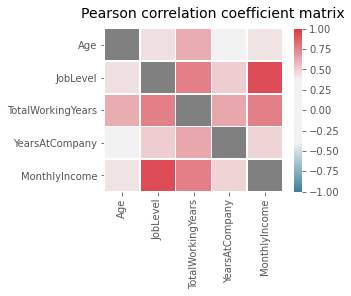

In [52]:
corr = vis_test[['Age', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

## 3.9. Autokorelasi
Autokorelasi adalah korelasi kesalahan (residual) dari waktu ke waktu. Digunakan ketika data dikumpulkan dari waktu ke waktu untuk mendeteksi apakah ada autokorelasi. Autokorelasi terjadi jika residual dalam satu periode waktu terkait dengan residual di periode lain. Kita dapat mendeteksi autokorelasi dengan melakukan uji Durbin-Watson untuk menentukan apakah ada korelasi positif atau negatif. Pada langkah ini kita akan menggunakan durbin_watson ()fungsi dari statsmodel untuk menghitung skor Durbin-Watson kita dan kemudian menilai nilainya dengan kondisi sebagai berikut:
- Jika skor Durbin-Watson kurang dari 1,5 maka terdapat autokorelasi positif dan asumsi tidak terpenuhi.
- Jika skor Durbin-Watson antara 1,5 dan 2,5 maka tidak ada autokorelasi dan asumsi puas.
- Jika skor Durbin-Watson lebih dari 2.5 maka terdapat autokorelasi negatif dan asumsi tidak puas.

In [53]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_test_new2['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.160636228778726
Little to no autocorrelation 

Assumption satisfied


Ini mengasumsikan homoskedastisitas, yang merupakan varian yang sama dalam istilah kesalahan kami. Heteroskedastisitas, pelanggaran homoskedastisitas, terjadi ketika kita tidak memiliki varian genap di seluruh istilah kesalahan. Untuk mendeteksi homoskedastisitas, kita dapat memplot residual kita dan melihat apakah variansnya tampak seragam.

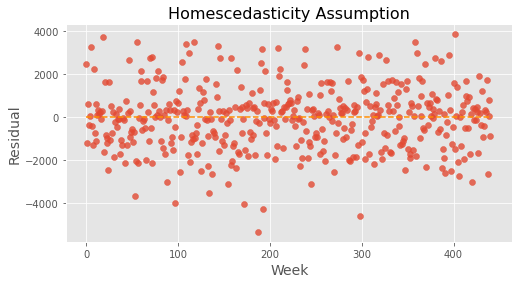

In [54]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_test_new2.index, y=df_test_new2.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_test_new2.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

Residual kami tampaknya memiliki varian yang konstan dan seragam, sehingga kami dapat mengasumsikan bahwa itu memenuhi asumsi homoskedastisitas.

## 3.10. Prediction MonthlyIncome

In [55]:
# Urutan Inputan : Age, JobLevel (1-5), TotalWorkingYears, YearsAtCompany 
salary_pred = regressor.predict([[30, 5, 10, 4]])
print("Gaji yang terprediksi pada pegawai perbulan yang bekerja sepanjang tahun tersebut adalah ",salary_pred)

Gaji yang terprediksi pada pegawai perbulan yang bekerja sepanjang tahun tersebut adalah  [[17908.63874979]]
